# Radial diffusion from point source in porous medium

After: Nicholson C, et al. (2000) Diffusion of molecules in brain extracellular space: theory and experiment.
Prog Brain Res, 2000. 125: p. 129-54. Using Nicholson's porosity and tortuosity factor values. No peptide uptake or degradation.


Nicholson (2000) Eqn 2:$$ \Large C = \frac{P}{\alpha (4D_{\text{eff}} \pi t)^{3/2}} \exp\left(-\frac{r^2}{4D_{\text{eff}}t}\right) $$

With C in mol/cm^3, alpha dimensionles, P in mol, D in cm^2/sec, t in sec and r in cm.

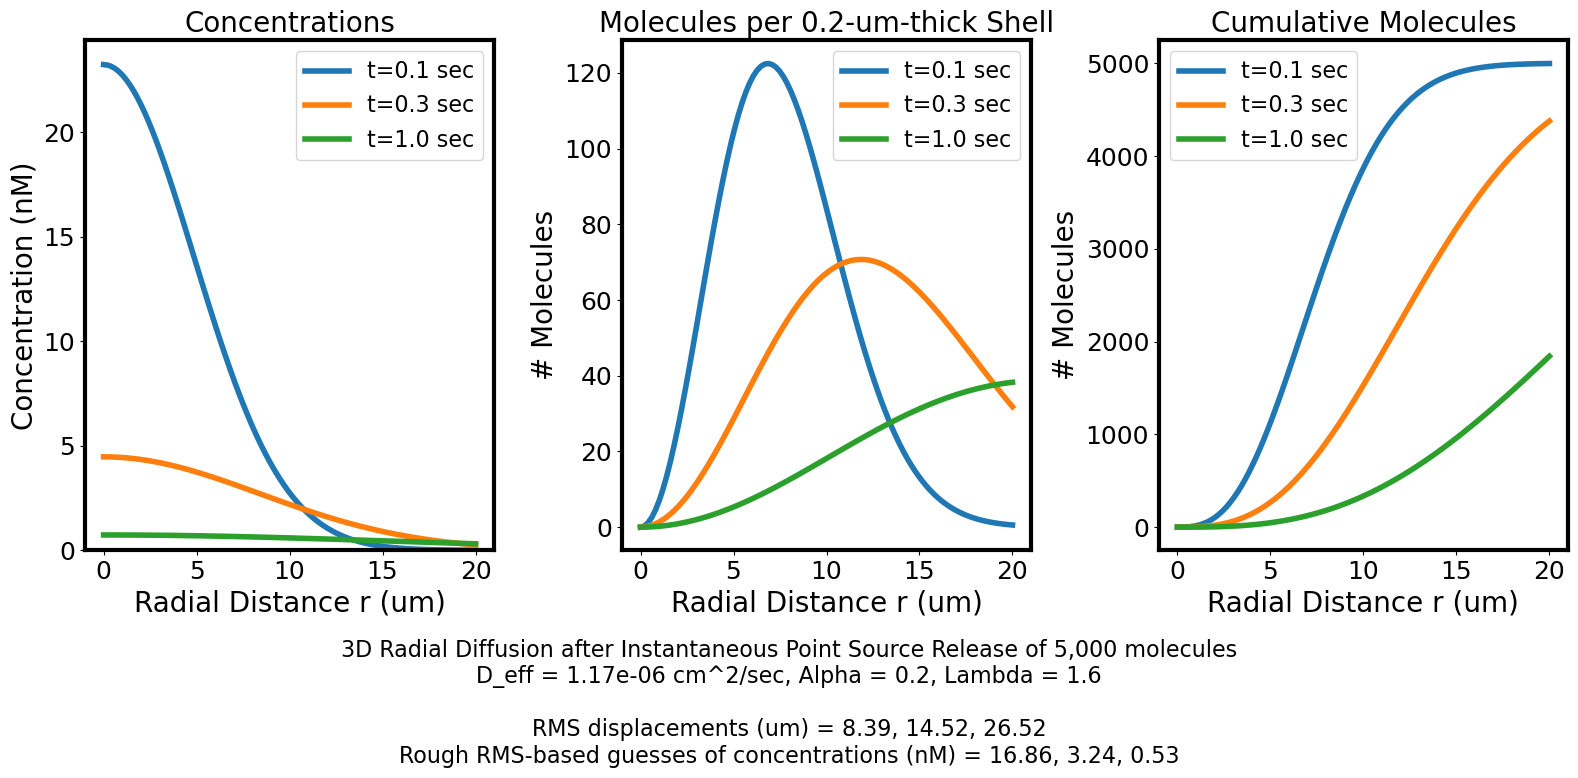

In [16]:
# Plots Eqn 2 as concentrations and molecule numbers as functions of radius in spherical geometry 
# for three time points after instantaneous point source release.
#
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from matplotlib.backends.backend_pdf import PdfPages

plt.rcParams['lines.linewidth'] = 4
plt.rcParams['axes.linewidth'] = 3 

plt.rcParams['axes.labelsize'] = 20       # x/y axis labels
plt.rcParams['xtick.labelsize'] = 18      # x-axis tick labels
plt.rcParams['ytick.labelsize'] = 18      # y-axis tick labels
plt.rcParams['axes.titlesize'] = 20       # subplot titles
plt.rcParams['legend.fontsize'] = 16      # legend text
plt.rcParams['figure.titlesize'] = 20     # figure suptitle

# Function to calculate concentration (units of mol/cm^3)
def concentration(P, Alpha, D, t, r): # Nicholson (2000) Eqn 2 (units of mol,-,cm^/sec,cm,sec)
    return (P / (Alpha * (4 * D * np.pi * t)**1.5)) * np.exp(-r**2 / (4 * D * t))

# Constants
Avonum = 6.02e23 # Avogodro's number
Molecules = 5000 # Number of molecules released per DCV
Moles = Molecules / Avonum # Number of Moles released
Alpha = 0.2 # Porosity (dimensionless included volume factor, 0-1.0)
Lambda = 1.6 # Tortuosity (dimensionless factor, >=1)
D_free = 3e-6 # Mid-range estimate of free diffusion coefficient for 8-aa peptide in water (cm^2/s)
D_eff = D_free / (Lambda**2) # Effective D = free_D/Lambda_squared (cm^2/s))
Rmax = 2e-3 # Extent of calculations and plots (cm)
Shells = 100 # r increment for calculation and plotting

# Conversion factors
cm3_per_Liter = 1000 # cm^3 per Liter
nM_per_M = 1e9 # Nanomolar per molar
um_per_cm = 1e4 # um per cm
nm_per_cm = 1e7 # nm per cm

# Times after release at which to evaluate the concentration profile
t0, t1, t2 = 0.1, 0.3, 1.0  # Times in seconds

# Serial number string generator
def serial(pad): # generate a zero padded serial number string
    sn_file = 'SN.txt'
    f = open(sn_file, "r")
    n = int(f.read())    
    f = open(sn_file, "w")
    f.write(str(n+1))
    f.close()
    return str(n).zfill(pad)

# Initialize to write a PDF
pdf = PdfPages('Products/Diffusion/PDFs/Radial_concs_'+serial(5)+'.pdf')

# r values (cm)
r = Rmax * np.linspace(0, 1, Shells) # array of r values
dr = r[1] - r[0]  # Radial increment based on the array of r values

# Calculate volumes of spherical Shells, 4*pi*r^2*dr, (cm^3)
dV = 4 * np.pi * r**2 * dr # array of dV values

# Calculate an array of concentrations for each time (Moles/cm^3)
Cp0 = concentration(Moles, Alpha, D_eff, t0, r)
Cp1 = concentration(Moles, Alpha, D_eff, t1, r)
Cp2 = concentration(Moles, Alpha, D_eff, t2, r)

# Calculate an array of total Moles in each shell for each time (Moles)
moles0 = Alpha * Cp0 * dV
moles1 = Alpha * Cp1 * dV
moles2 = Alpha * Cp2 * dV

# Calculate an array of cumulative molecule counts for each time (Moles)
cumulative_moles0 = np.cumsum(moles0)
cumulative_moles1 = np.cumsum(moles1)
cumulative_moles2 = np.cumsum(moles2)

# Calculate an array of RMS deviations for each time (cm)
rmsdev0 = sqrt(6*D_eff*t0)
rmsdev1 = sqrt(6*D_eff*t1)
rmsdev2 = sqrt(6*D_eff*t2)

# Calculate an array of volumes from RMS deviations for each time (cm^3)
rmsvol0 = Alpha * 1.33 * np.pi * rmsdev0**3
rmsvol1 = Alpha * 1.33 * np.pi * rmsdev1**3
rmsvol2 = Alpha * 1.33 * np.pi * rmsdev2**3

# Rough (RMS-dev-based) calculation of an array of concentrations for each time (M) 
rmsconc0 = Moles / rmsvol0
rmsconc1 = Moles / rmsvol1
rmsconc2 = Moles / rmsvol2

# Plotting concentration at r
plt.rcParams['font.size'] = 14 # or any other size
plt.figure(figsize=(16, 8))
plt.subplot(1, 3, 1)
plt.plot(um_per_cm * r, nM_per_M * cm3_per_Liter * Cp0, label=f't={t0} sec')
plt.plot(um_per_cm * r, nM_per_M * cm3_per_Liter * Cp1, label=f't={t1} sec')
plt.plot(um_per_cm * r, nM_per_M * cm3_per_Liter * Cp2, label=f't={t2} sec')
plt.title('Concentrations') #, fontsize=16)
plt.xlabel('Radial Distance r (um)')
plt.ylabel('Concentration (nM)')
plt.legend()
#plt.grid(True)
plt.ylim(bottom=0)

# Plotting Moles at r
plt.subplot(1, 3, 2)
plt.plot(um_per_cm * r, Avonum * moles0, label=f't={t0} sec')
plt.plot(um_per_cm * r, Avonum * moles1, label=f't={t1} sec')
plt.plot(um_per_cm * r, Avonum * moles2, label=f't={t2} sec')
plt.title('Molecules per '+str(um_per_cm * Rmax/100)+'-um-thick Shell') #, fontsize=16)
plt.xlabel('Radial Distance r (um)')
plt.ylabel('# Molecules')
plt.legend()
#plt.grid(True)

# Plotting cumulative Moles at r
plt.subplot(1, 3, 3)
plt.plot(um_per_cm * r, Avonum * cumulative_moles0, label=f't={t0} sec')
plt.plot(um_per_cm * r, Avonum * cumulative_moles1, label=f't={t1} sec')
plt.plot(um_per_cm * r, Avonum * cumulative_moles2, label=f't={t2} sec')
plt.title('Cumulative Molecules') #, fontsize=16)
plt.xlabel('Radial Distance r (um)')
plt.ylabel('# Molecules')
plt.legend()
#plt.grid(True)

# Add an overall title to the figure
plt.suptitle('3D Radial Diffusion after Instantaneous Point Source Release of '+f"{Molecules:,.0f}"+' molecules\n'+
             'D_eff = '+f"{D_eff:,.2e}" +' cm^2/sec, Alpha = '+str(Alpha)+', Lambda = '+str(Lambda)+'\n\n'+
             'RMS displacements (um) = '+
             f"{um_per_cm * rmsdev0:,.2f}"+', '+
             f"{um_per_cm * rmsdev1:,.2f}"+', '+
             f"{um_per_cm * rmsdev2:,.2f}"+'\n'+
             'Rough RMS-based guesses of concentrations (nM) = '+
             f"{nM_per_M * cm3_per_Liter * rmsconc0:,.2f}"+', '+
             f"{nM_per_M * cm3_per_Liter * rmsconc1:,.2f}"+', '+
             f"{nM_per_M * cm3_per_Liter * rmsconc2:,.2f}",
             fontsize=16, y=0)

plt.tight_layout()
pdf.savefig(dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()
pdf.close()

Nicholson (2000) Eqn 4, peak concentration:$$ \Large C_{\text{max}} = \frac{P \cdot 0.0736}{\alpha r^3} $$

With C in mol/cm^3, alpha dimensionles, P in mol and r in cm.

To scale secondary Y axis to difusion-limited on-rate (molecule capture by disk-like absorber from semi-infinite medium from Berg 2018 Eqn 2.21):

$$ \Large I = 4 D s C_0$$

With diffusion current $I$ in molecules/sec, $D$ in cm^2/sec, disk radius $s$ in cm and bulk concentration $C_0$ in molecules/cm^3.

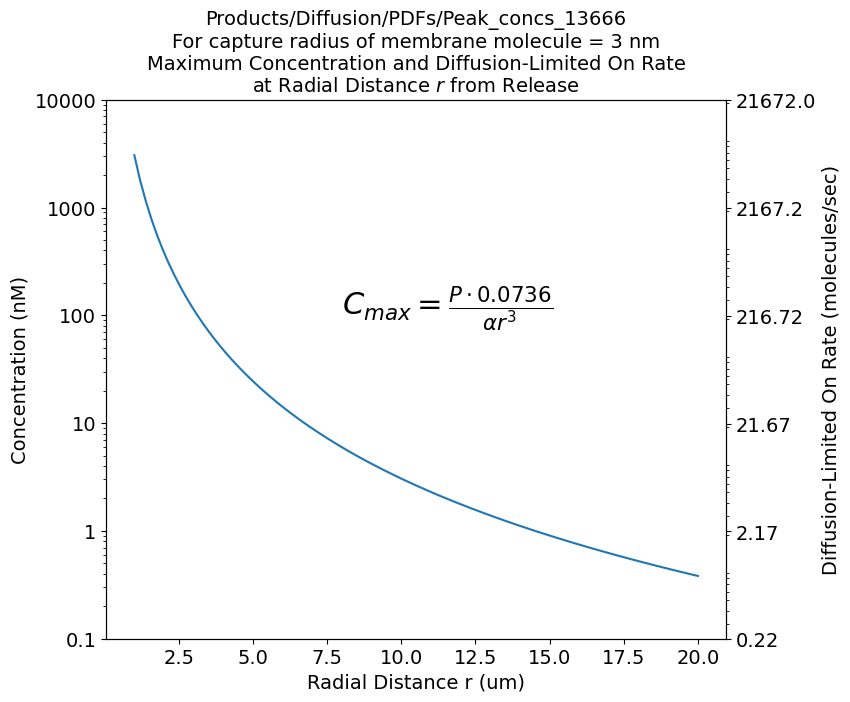

On rate at r = 10 nm:  6.977299842695137  per second


In [2]:
# Plots Eqn 4 for peak concentration as a function of radius after instantaneous point source release
# Secondary axis shows corresponding peak diffusion-limited on rate

# Function to calculate peak concentrations  
def peak_conc(P, Alpha, r): # Nicholson (2000) Eqn 4 (units of mol,-,cm)
    return(P * 0.0736 / (Alpha * r**3)) # mol / cm^3

# Function to calculate diffusion-limited on-rate constant
def k_on_diff(D, s): # From Berg 2018 Eqn 2.21
    return(4 * D * s)

# For an example
nM = 1 # Nanomolar bulk concentration for secondary axis scaling

# Receptor parameter
s_nm = 3 # radius of absorbing disk in nanometers
s_cm = s_nm / nm_per_cm # radius of absorbing disk in centimeters

# Convert from M and nm units to molecule and cm units
M = nM / nM_per_M # Moles/Liter bulk concentration
Mcc =  M / cm3_per_Liter # Moles/cm^3
C0 = Mcc * Avonum # Molecules/cm^3 

# Diffusion-limited on-rate for 1 nM bulk conc = 2.17 (molecules/second) from my "Disk_Capture" script 
scale_factor = k_on_diff(D_free, s_cm)*C0

# Initialize to write a PDF
filename = 'Products/Diffusion/PDFs/Peak_concs_'+serial(5)
pdf = PdfPages(filename+'.pdf')

# Define a range of r values to avoid division by zero or ridiculoously small values
Rmax = 2e-3 # Extent of calculations and plots (cm)
Fracmin = 0.05
r = Rmax * np.linspace(Fracmin, 1, 100)

# Calculate C_max using the given formula
C_max = peak_conc(Moles, Alpha, r) #Moles * 0.0736 / (Alpha * r**3) # Moles / Liter

# Create the figure and primary Y-axis
fig, ax1 = plt.subplots(figsize=(8, 7))

# Plot C_max on the left Y-axis
ax1.plot(um_per_cm * r, nM_per_M * cm3_per_Liter * C_max)

plt.title(filename+'\nFor capture radius of membrane molecule = '+str(s_nm)+' nm\n'+
          'Maximum Concentration and Diffusion-Limited On Rate\nat Radial Distance $r$ from Release',
          fontsize=14)
#plt.title('Maximum Concentration at Radial Distance $r$ from Release', fontsize=14)
plt.xlabel('Radial Distance r (um)')
plt.ylabel('Concentration (nM)')

# Display the LaTeX equation inside the plot area at coordinates (x=2, y=10)
plt.text(8, 100, r'$C_{{max}} = \frac{P \cdot 0.0736}{\alpha r^3}$', fontsize=22, color='black')

# Set the left Y-axis to logarithmic scale
ax1.set_yscale('log')
ax1.set_ylim(bottom=0.1)

# Set custom y-axis tick labels
ticks = [0.1, 1, 10, 100, 1000, 10000]  # Define tick positions
ax1.set_yticks(ticks)
ax1.set_yticklabels([str(tick) for tick in ticks]) #, color='b')

# Create a secondary Y-axis with scaled values
ax2 = ax1.twinx()  # Create a twin axis sharing the same x-axis
ax2.set_yscale('log')  # Keep logarithmic scale

# Scale the tick positions and labels for the right Y-axis
on_rate_ticks = [round((tick * scale_factor), 2) for tick in ticks]
ax2.set_yticks(on_rate_ticks)
ax2.set_yticklabels([str(tick) for tick in on_rate_ticks]) #, color='r')

# Set label for the second Y-axis
ax2.set_ylabel(f'Diffusion-Limited On Rate (molecules/sec)')#, color='r')

# Grid and legend
#ax1.grid(True)

pdf.savefig(dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()
pdf.close()

print('On rate at r = 10 nm: ',str(nM_per_M * cm3_per_Liter * C_max[46] * scale_factor),' per second')

In [ ]:
nM_per_M * cm3_per_Liter * C_max[46] * scale_factor

Nicholson (2000) Eqn 3, time of peak concentration:

$$ \Large t = \frac{r^2}{6D_{\text{eff}}} $$

With t in sec, r in cm and D* in cm^2/sec.

In [ ]:
r[46]

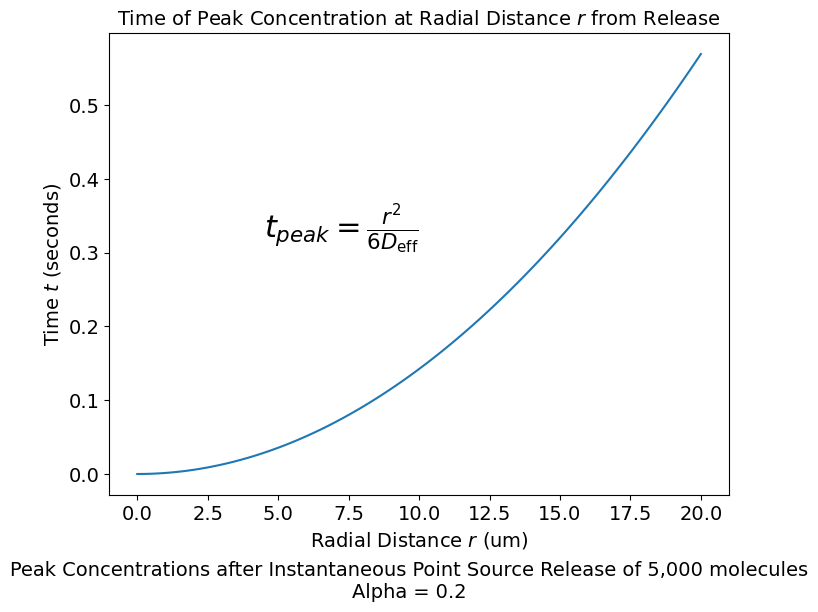

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize to write a PDF
pdf = PdfPages('Products/Diffusion/PDFs/Peak_times_'+serial(5)+'.pdf')

# Define the range of r values
Rmax = 2e-3 # Extent of calculations and plots (cm)
r = Rmax * np.linspace(0, 1, 100)

# Compute t_max
t_max = r**2 / (6 * D_eff)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(um_per_cm * r, t_max) # , label=r'$t$') # = \frac{r^2}{6D_{\mathrm{eff}}}$')

# Set title and axis labels with increased font size
plt.title(r'Time of Peak Concentration at Radial Distance $r$ from Release', fontsize=14)
plt.xlabel(r'Radial Distance $r$ (um)', fontsize=14)
plt.ylabel(r'Time $t$ (seconds)', fontsize=14)

# Display the LaTeX equation inside the plot area at coordinates (x=2, y=10)
plt.text(4.5, 0.32, r'$t_{{peak}} = \frac{r^2}{6D_{\mathrm{eff}}}$', fontsize=22, color='black')

# Display the grid
#plt.grid(True)

plt.suptitle('Peak Concentrations after Instantaneous Point Source Release of '+f"{Molecules:,.0f}"+' molecules\n'+
             'Alpha = '+str(Alpha), fontsize=14, y=0)

#plt.tight_layout()
pdf.savefig(dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()
pdf.close()